# 파이썬 기본 시각화 패키지 - [matplotlib](https://matplotlib.org)
- 프로그램 형식 2D, 3D 데이터 시각화 API. 두 가지 형태의 API
  - Stateful API
  - 객체지향적 API
- [Matplotlib의 창립자 John Hunter](https://www.youtube.com/watch?v=e3lTby5RI54)
- [사용 설명서](https://matplotlib.org/users/index.html)

## matplotlib 요약 

- ### https://matplotlib.org/tutorials/index.html
- https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

## [matplotlib 개념 설명](https://realpython.com/python-matplotlib-guide/)
---------------------------------------


### Chapter 4: Plotting and visualization

https://github.com/Apress/numerical-python-second-ed

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](https://www.apress.com/kr/book/9781484242452) (ISBN 978-1-484205-54-9).

The source code listings can be downloaded from https://www.apress.com/kr/book/9781484242452

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

## Gettings started  : Matplotlib의 객체 hierarchy
- [여기 쉽게 설명 : 꼭 새기세요...](https://realpython.com/python-matplotlib-guide/)
- https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py 


A graph in Matplotlib is structured in terms of a `Figure` instance and one or more
`Axes` instances within the figure. The Figure instance provides a canvas area for drawing,
and the Axes instances provide coordinate systems that are assigned to fixed regions of
the total figure canvas; 
- Figure : 그래프를 그릴 공간 (캔버스). 하나의 `figure`는 여러개의 `axes`를 갖을 수 있음 
- Axes : Figure (캔버스)내에 구체적으로 그려지는 플롯/그래프. ***영어로 'Axis' 하면 '축' 이라 번역되는데, matplotlib에서 axes는 단순한 축이 아니라 그래프 그 자체 또는 그래프가 그려지는 '좌표계'라 생각해야 함.*** 그래프는 `좌표계`가 필요하기에 좌표계(Axes) 클래스 부름. 우리가 그래프를 그릴 때 주로 사용하는 함수들이 `axes` 클래스의 메소드 임.   
- line, tick, legend...  : Axes 내에 구체적으로 그래프/플롯을 구성하는 'plot elements' 객체들. 

## Matplotlib를 사용하는 두 가지 방법 :
1. Stateful 접근 : The stateful interface makes its calls with `plt.plot()` and other ***top-level pyplot functions***. There is only ever **one** `Figure` or `Axes` that you’re manipulating **implicitely** at a given time, and you don’t need to explicitly refer to it. `In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes`. [참고](https://matplotlib.org/users/pyplot_tutorial.html)
2. Stateless 접근 : 객체 지향적 방법.  플롯을 구성하는 객체들(Figure, Axes, plot elements)을 구체적으로 생성하고, 그 메소드를 사용하면서 플롯을 만듬.   
3. Stateless 객체지향적 접근이 더 명확하고 구체적으로 플롯을 조작할 수 있으나 흔하게 사용하는 플롯은 `stateful` 하게 그리는 경우가 많음.  좀 혼란스럽기는 함. 
   
### 이 노트북은 `Stateless` 방법의 Matplotlib 사용법을 가르킴 

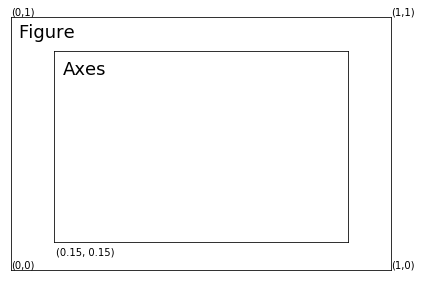

In [3]:
# 다음은 Stateless 객체 지향적으로 플롯을 만드는 예

fig = plt.figure()

ax = fig.add_axes([0.05, 0.05, .88, .88])     # 첫번 째 플롯 
ax.set_yticks([])
ax.set_xticks([])
ax.text(0.001, 0.01, "(0,0)")
ax.text(1.001, 0.01, "(1,0)")
ax.text(0.001, 1.01, "(0,1)")
ax.text(1.001, 1.01, "(1,1)")
ax.text(0.02, 0.92, "Figure", fontsize=18)

ax.text(0.12, 0.06, "(0.15, 0.15)")

ax = fig.add_axes([0.15, 0.15, 0.68, 0.66])   # 두번 째 플롯 
ax.text(0.03, 0.88, "Axes", fontsize=18)
ax.set_yticks([])
ax.set_xticks([])


fig.savefig("figure-axes-schematic.pdf");

In [4]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

Figure 4-1. Illustration of the arrangement of a Matplotlib `Figure` instance and
an `Axes` instance. The Axes instance provides a coordinate system for plotting, and
the Axes instance itself is assigned to a region within the figure canvas. The figure
canvas has a simple coordinate system where (0, 0) is the lower-left corner and
(1,1) is the upper-right corner. This coordinate system is only used when placing
elements, such as an Axes, directly on the figure canvas.

-------------------------

As a simple example for getting started with Matplotlib, say that we would like to
graph the function $y(x) = x^3+5x^2+10$, together with its first and second derivatives, over
the range x ∈ [−5, 2]. To do this we first create NumPy arrays for the x range and then
compute the three functions we want to graph. When the data for the graph is prepared,
we need to create Matplotlib Figure and Axes instances, then use the `plot` method of the
Axes instance to plot the data, and set basic graph properties such as x and y axis labels, using the `set_xlabel` and `set_ylabel` methods and generating a legend using the
`legend` method. These steps are carried out in the following code, and the resulting
graph is shown in Figure 4-2.

In [5]:
x = np.linspace(-5, 2, 100)
x

array([-5.        , -4.92929293, -4.85858586, -4.78787879, -4.71717172,
       -4.64646465, -4.57575758, -4.50505051, -4.43434343, -4.36363636,
       -4.29292929, -4.22222222, -4.15151515, -4.08080808, -4.01010101,
       -3.93939394, -3.86868687, -3.7979798 , -3.72727273, -3.65656566,
       -3.58585859, -3.51515152, -3.44444444, -3.37373737, -3.3030303 ,
       -3.23232323, -3.16161616, -3.09090909, -3.02020202, -2.94949495,
       -2.87878788, -2.80808081, -2.73737374, -2.66666667, -2.5959596 ,
       -2.52525253, -2.45454545, -2.38383838, -2.31313131, -2.24242424,
       -2.17171717, -2.1010101 , -2.03030303, -1.95959596, -1.88888889,
       -1.81818182, -1.74747475, -1.67676768, -1.60606061, -1.53535354,
       -1.46464646, -1.39393939, -1.32323232, -1.25252525, -1.18181818,
       -1.11111111, -1.04040404, -0.96969697, -0.8989899 , -0.82828283,
       -0.75757576, -0.68686869, -0.61616162, -0.54545455, -0.47474747,
       -0.4040404 , -0.33333333, -0.26262626, -0.19191919, -0.12

In [6]:
y1 = x**3 + 5*x**2 + 10
y1

array([10.        , 11.71803537, 13.33820194, 14.8626207 , 16.29341265,
       17.63269879, 18.88260011, 20.0452376 , 21.12273227, 22.11720511,
       23.03077711, 23.86556927, 24.62370259, 25.30729806, 25.91847668,
       26.45935943, 26.93206733, 27.33872136, 27.68144252, 27.96235181,
       28.18357022, 28.34721874, 28.45541838, 28.51029013, 28.51395498,
       28.46853393, 28.37614797, 28.23891811, 28.05896533, 27.83841063,
       27.57937502, 27.28397947, 26.954345  , 26.59259259, 26.20084325,
       25.78121795, 25.33583772, 24.86682353, 24.37629638, 23.86637727,
       23.3391872 , 22.79684716, 22.24147814, 21.67520115, 21.10013717,
       20.51840721, 19.93213226, 19.34343331, 18.75443137, 18.16724742,
       17.58400246, 17.00681749, 16.4378135 , 15.87911149, 15.33283246,
       14.80109739, 14.2860273 , 13.78974316, 13.31436598, 12.86201676,
       12.43481648, 12.03488615, 11.66434676, 11.32531931, 11.01992479,
       10.75028419, 10.51851852, 10.32674877, 10.17709593, 10.07

In [7]:
y2 = 3*x**2 + 10*x   # 1차 미분 

In [8]:
y3 = 6*x + 10     # 2차 미분 

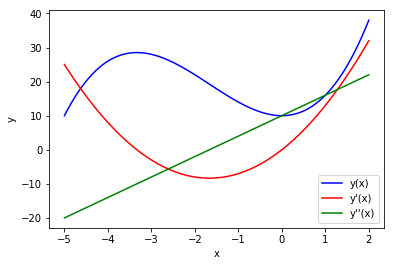

In [9]:
fig, ax = plt.subplots()    # figure와 axes 객체를 한 번에 만듬.  'nrows=1', 'ncols=1' 이 기본.  

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [10]:
fig.savefig("ch4-figure-1.pdf")

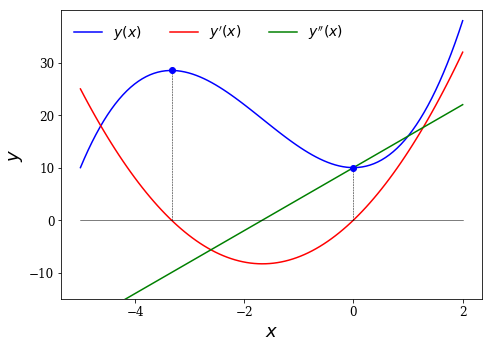

In [10]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(x, y1, lw=1.5, color="blue", label=r"$y(x)$")    # $y''(x)$ : LaTex 표기 
ax.plot(x, y2, lw=1.5, color="red", label=r"$y'(x)$")
ax.plot(x, y3, lw=1.5, color="green", label=r"$y''(x)$")     

ax.plot(x, np.zeros_like(x), lw=0.5, color="black")
ax.plot([-3.33, -3.33], [0, (-3.3)**3 + 5*(-3.3)**2 + 10], ls='--', lw=0.5, color="black")
ax.plot([0, 0], [0, 10], lw=0.5, ls='--', color="black")
ax.plot([0], [10], lw=0.5, marker='o', color="blue")
ax.plot([-3.33], [(-3.3)**3 + 5*(-3.3)**2 + 10], lw=0.5, marker='o', color="blue")

ax.set_ylim(-15, 40)
ax.set_yticks([-10, 0, 10, 20, 30])
ax.set_xticks([-4, -2, 0, 2])

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.legend(loc=0, ncol=3, fontsize=14, frameon=False)

fig.tight_layout();

In [12]:
fig.savefig("ch4-figure-2.pdf")

In [11]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "10"

### Backends

In [12]:
%matplotlib inline
#%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [13]:
import matplotlib as mpl
#mpl.use('qt4agg')
import matplotlib.pyplot as plt
import numpy as np

In [14]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

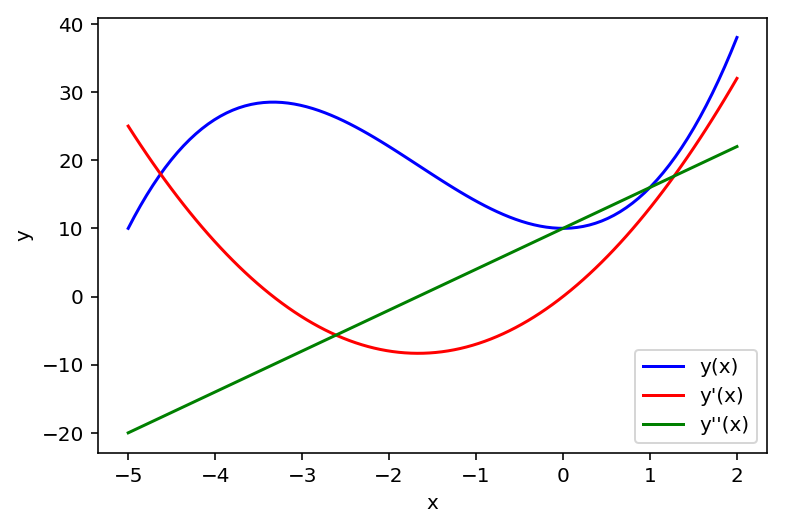

In [15]:
fig, ax = plt.subplots()

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()

In [16]:
mpl.is_interactive()

True

## Figure

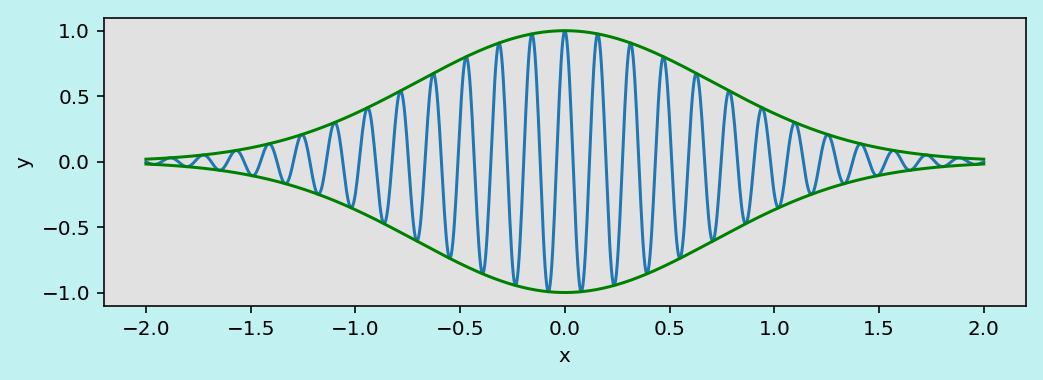

In [17]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#c1f1f1")   # (width, height) in inches 

# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("graph.png", dpi=100, facecolor="#e1e1e1")
fig.savefig("graph.pdf", dpi=300, facecolor="#e1e1e1")

## Axes  
The Axes object is central to most plotting activities with the Matplotlib library.
It provides the `coordinate system` in which we can plot data and mathematical functions,
and in addition it contains the axis objects that determine where the axis labels and the
axis ticks are placed. The functions for drawing different types of plots are also methods
of this Axes class.

- A new Axes instances can be added to a figure explicitly using the `add_axes` method. `add_axes`를 이용해 figure에 axes를 넣는 것은 강력하고 유연한 방법이긴 하지만 많은 경우 더 간략하게 figure와 axes를 생성하는 방법을 사용한다. 
- Matplotlib provides several different Axes layout managers, which create and place Axes instances within a figure canvas following different strategies.   `plt.subplots` 함수가 그 중 하나.  
  - `fig, axes = plt.subplots(nrows=3, ncols=2)` : returns a tuple (fig, axes), where fig is a Figure
instance and axes is a NumPy array of size (nrows, ncols), in which each element is an
Axes instance that has been appropriately placed in the corresponding figure canvas

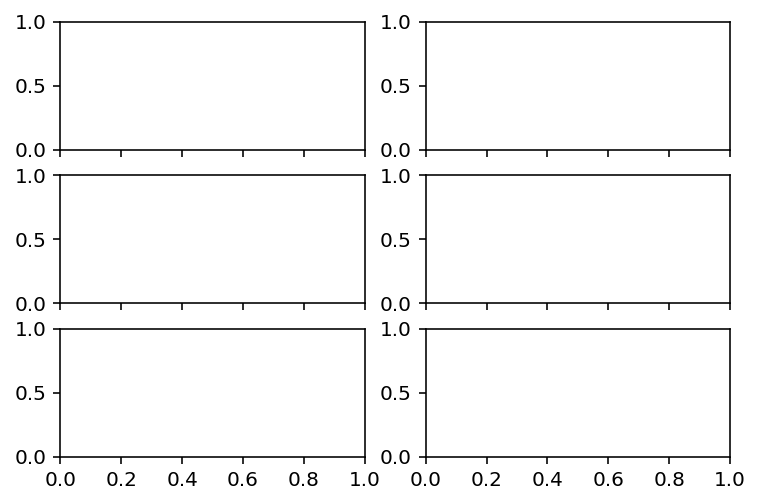

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True)

In [24]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001502B082A58>,
      dtype=object)

## Plot types

In [25]:
fignum = 0

def hide_labels(fig, ax):
    global fignum
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.axis('tight')
    
    fignum += 1
    fig.savefig("plot-types-%d.pdf" % fignum)
    

In [26]:
x = np.linspace(-3, 3, 25)
y1 = x**3+ 3 * x**2 + 10
y2 = -1.5 * x**3 + 10*x**2 - 15

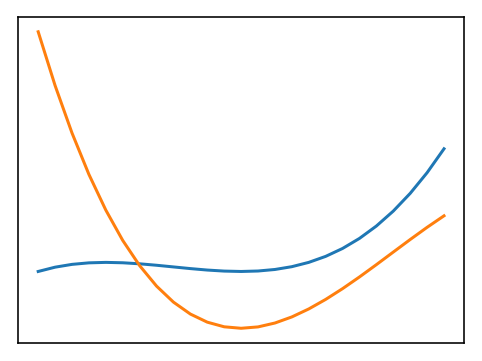

In [27]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(x, y1)
ax.plot(x, y2)

hide_labels(fig, ax)

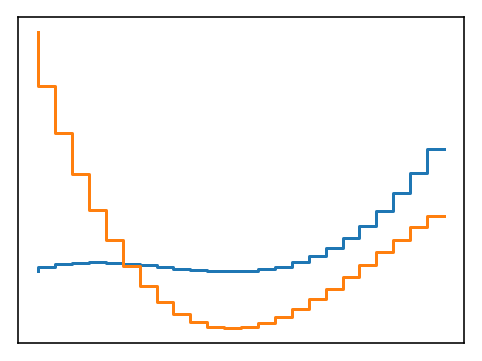

In [28]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.step(x, y1)
ax.step(x, y2)

hide_labels(fig, ax)

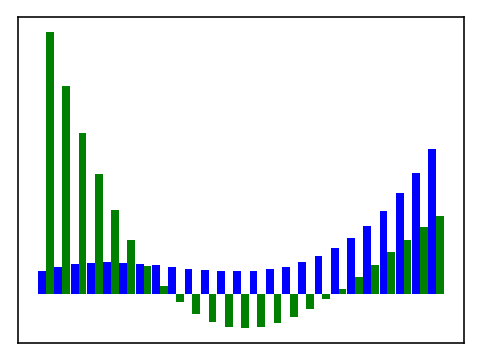

In [29]:
fig, ax = plt.subplots(figsize=(4, 3))
width = 6/50.0
ax.bar(x - width/2, y1, width=width, color="blue")
ax.bar(x + width/2, y2, width=width, color="green")

hide_labels(fig, ax)

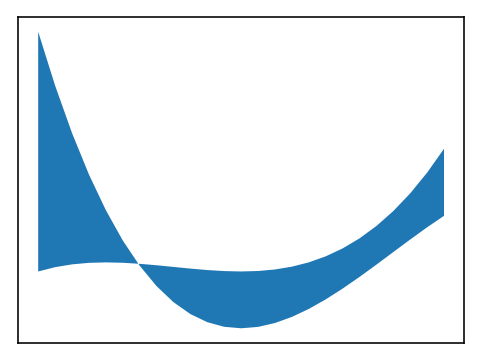

In [30]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.fill_between(x, y1, y2)

hide_labels(fig, ax)

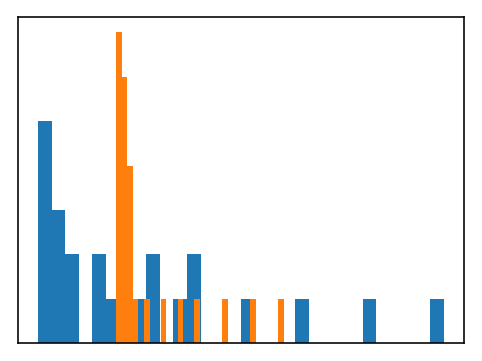

In [31]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.hist(y2, bins=30)
ax.hist(y1, bins=30)

hide_labels(fig, ax)

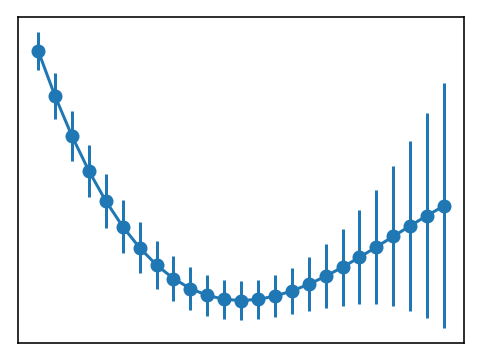

In [32]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.errorbar(x, y2, yerr=y1, fmt='o-')

hide_labels(fig, ax)

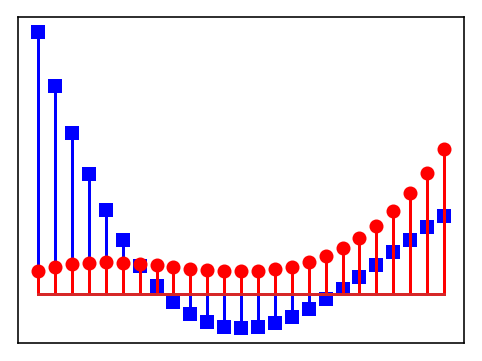

In [33]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.stem(x, y2, 'b', markerfmt='bs')
ax.stem(x, y1, 'r', markerfmt='ro')

hide_labels(fig, ax)

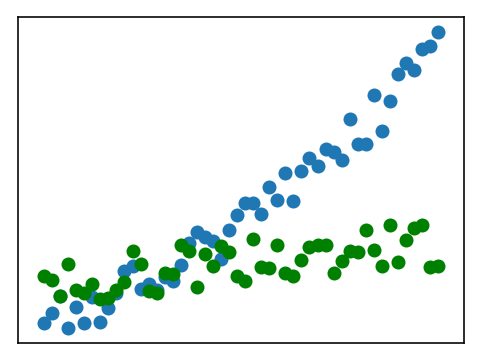

In [34]:
fig, ax = plt.subplots(figsize=(4, 3))

x = np.linspace(0, 5, 50)

ax.scatter(x, -1 + x + 0.25 * x**2 + 2 * np.random.rand(len(x)))
ax.scatter(x, np.sqrt(x) + 2 * np.random.rand(len(x)), color="green")

hide_labels(fig, ax)

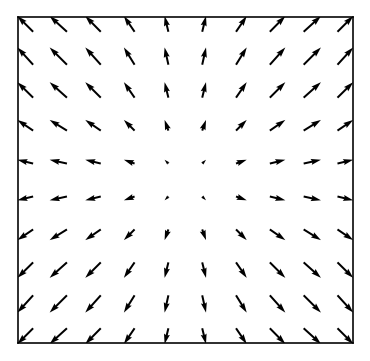

In [28]:
fig, ax = plt.subplots(figsize=(3, 3))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

x = y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
U = np.sin(X)
V = np.sin(Y)

ax.quiver(X, Y, U, V)

hide_labels(fig, ax)

## Text formatting and annotation

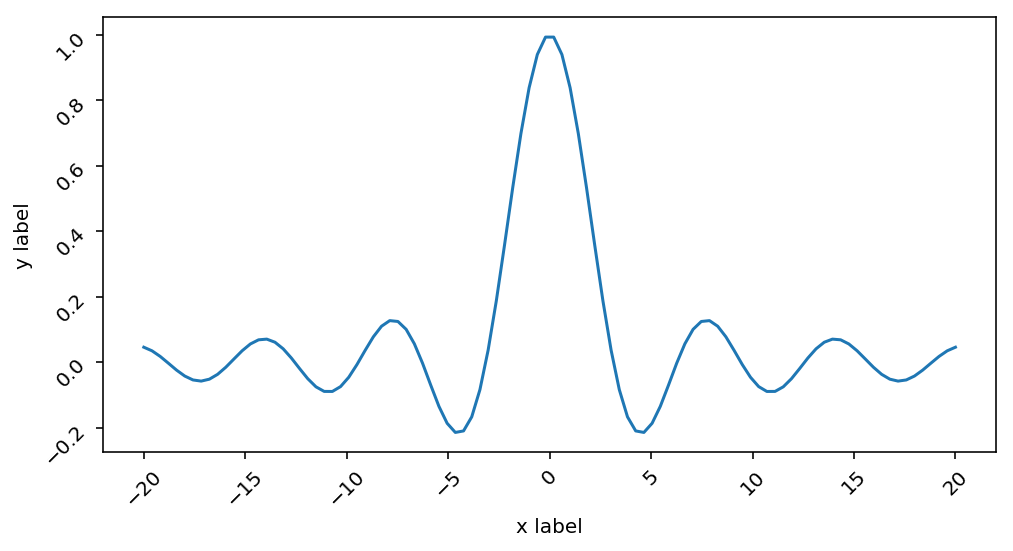

In [35]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(-20, 20, 100)
y = np.sin(x) / x

ax.plot(x, y)

ax.set_ylabel("y label")
ax.set_xlabel("x label")

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_rotation(45)

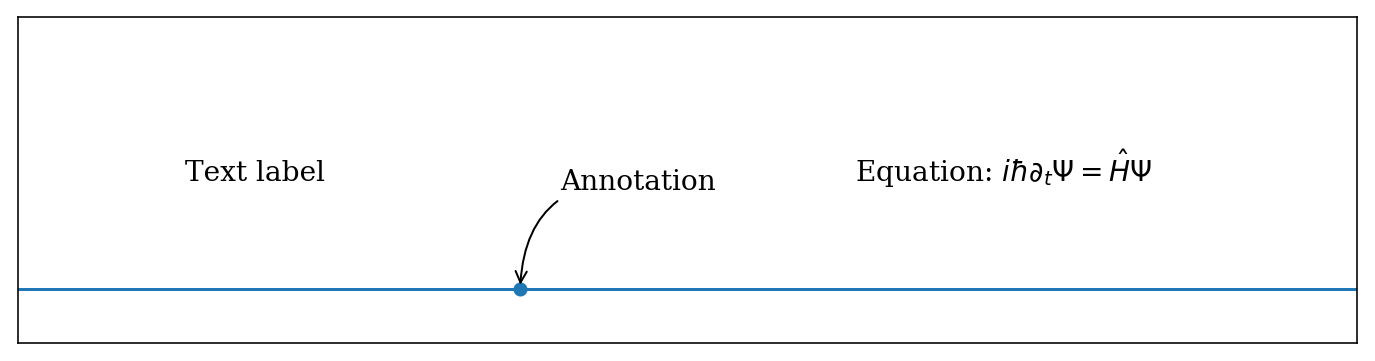

In [36]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.plot(1, 0, 'o')
ax.annotate("Annotation",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

fig.savefig("ch4-text-annotation.pdf")

## Axes

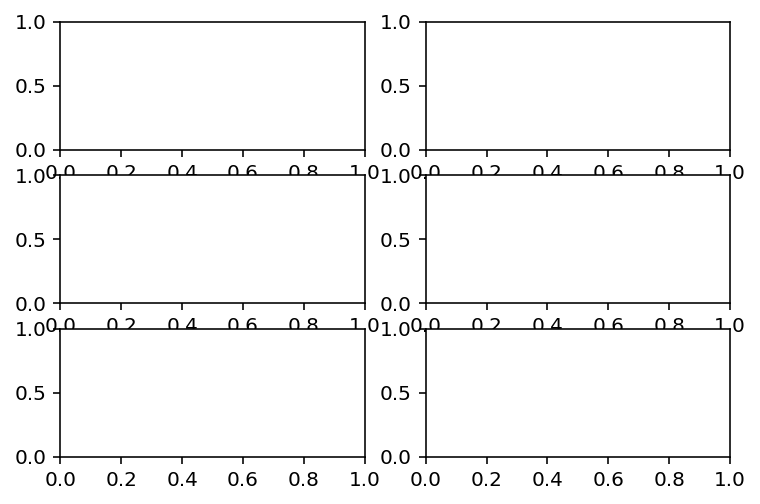

In [37]:
fig, axes = plt.subplots(ncols=2, nrows=3)

## Line properties

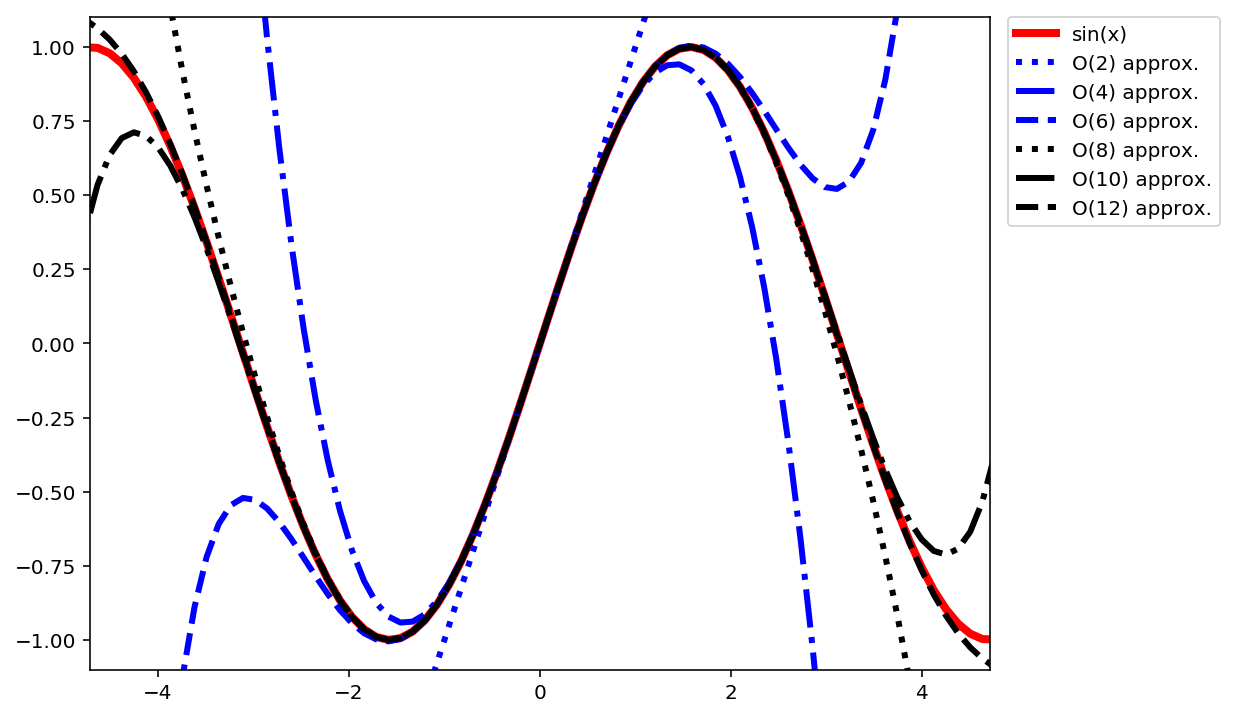

In [42]:
import sympy as s
import numpy as np

# a symbolic variable for x, and a numerical array with specific values of x
sym_x = s.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluate the nth order Talyor series expansion
    of sin(x) for the numerical values in the array x.
    """
    return s.lambdify(sym_x, s.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, np.sin(x), linewidth=4, color="red", label='sin(x)')

colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="O(%d) approx." % (n+1))    # 여기서 label을 loop에 따라 자동으로 생성 
    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)
fig.subplots_adjust(right=.75);

In [35]:
fig.savefig("sin-expansion.pdf")

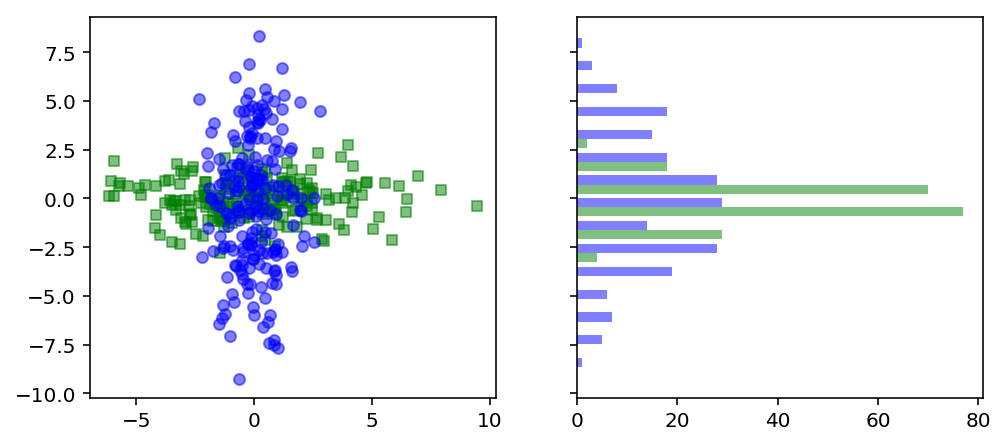

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)

data1 = np.random.randn(200, 2) * np.array([3, 1])
area1 = (np.random.randn(200) + 0.5) * 100

data2 = np.random.randn(200, 2) * np.array([1, 3])
area2 = (np.random.randn(200) + 0.5) * 100

axes[0].scatter(data1[:,0], data1[:,1], color="green", marker="s", s=30, alpha=0.5)
axes[0].scatter(data2[:,0], data2[:,1], color="blue", marker="o", s=30, alpha=0.5)

axes[1].hist([data1[:,1], data2[:,1]], bins=15, color=["green", "blue"], alpha=0.5, orientation='horizontal');

## Legends

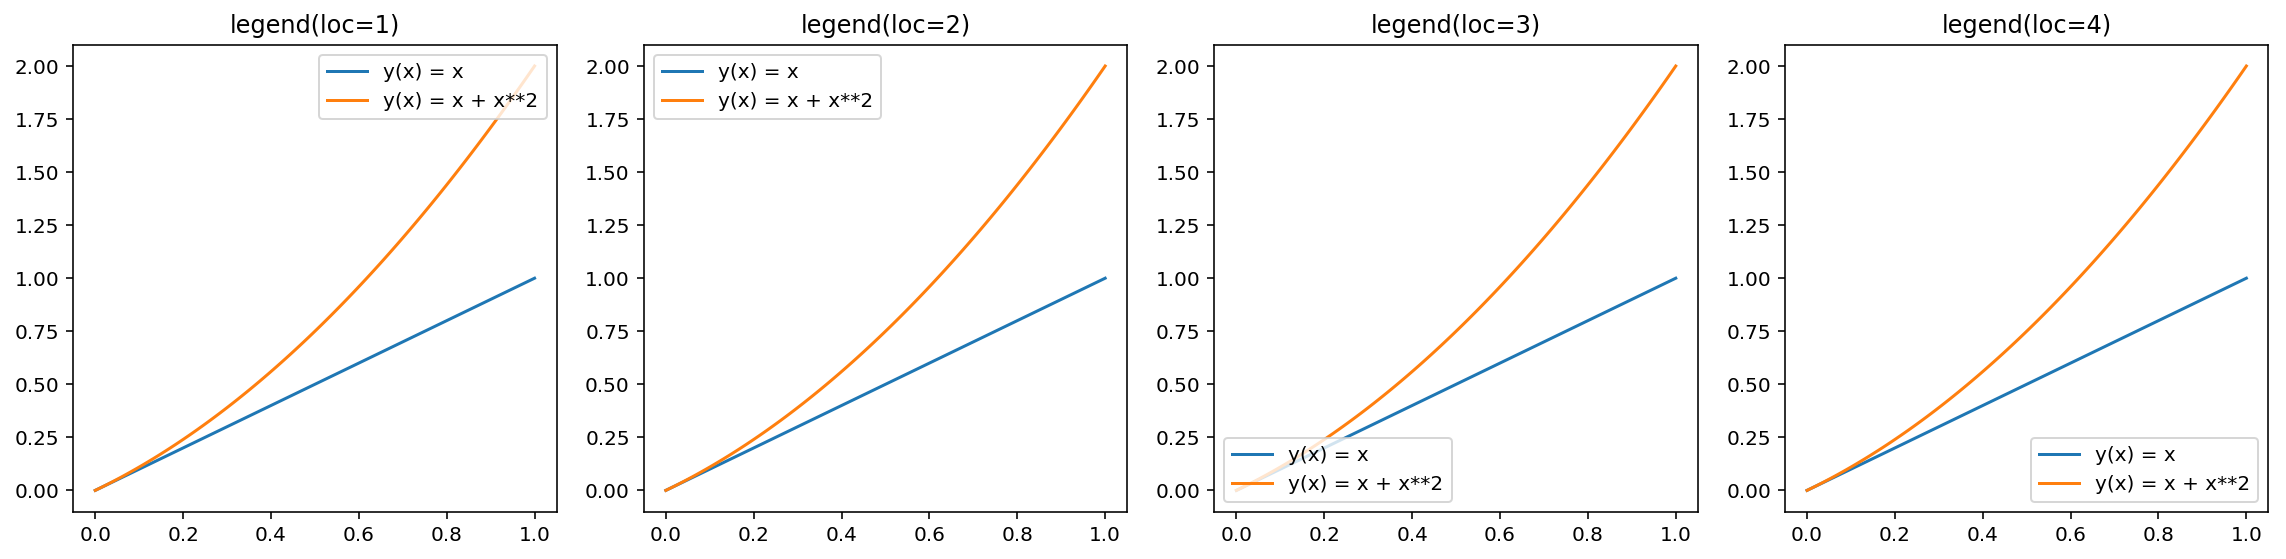

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

x = np.linspace(0, 1, 100)

for n in range(4):
    axes[n].plot(x, x, label="y(x) = x")
    axes[n].plot(x, x + x**2, label="y(x) = x + x**2")
    axes[n].legend(loc=n+1)
    axes[n].set_title("legend(loc=%d)" % (n+1))

fig.tight_layout()
fig.savefig("legend-loc.pdf")

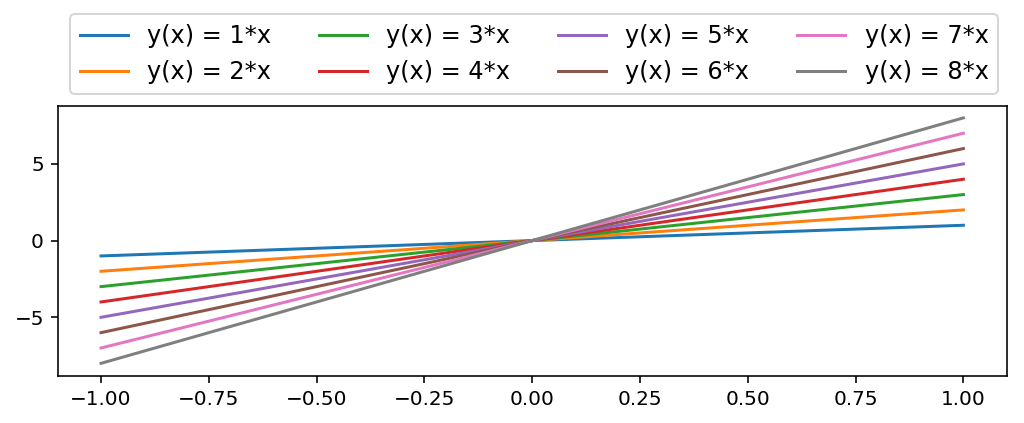

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8.5, 3))

x = np.linspace(-1, 1, 100)

for n in range(1, 9):
    ax.plot(x, n * x, label="y(x) = %d*x" % n)

ax.legend(ncol=4, loc=3, bbox_to_anchor=(0, 1), fontsize=12)
fig.subplots_adjust(top=.75);
fig.savefig("legend-loc-2.pdf")

## Axis Properties
### Axis labels

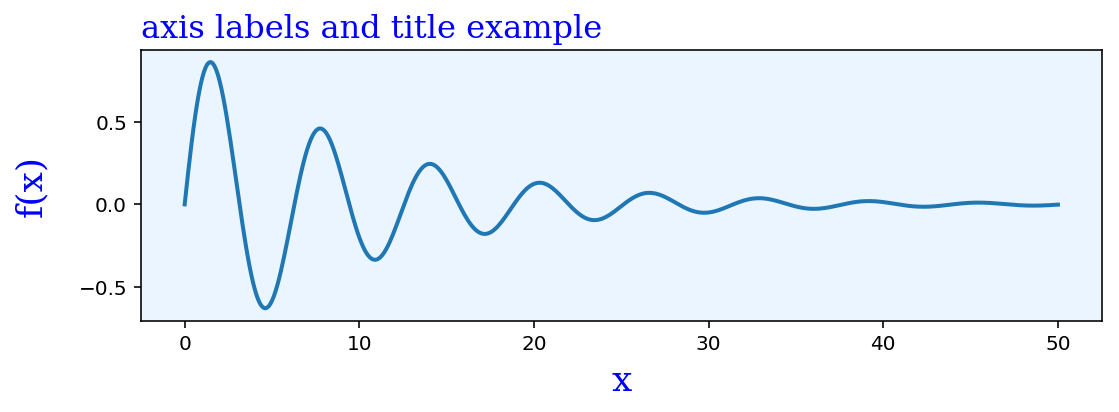

In [48]:
fig, ax = plt.subplots(figsize=(8, 3), subplot_kw={'facecolor': "#ebf5ff"})

x = np.linspace(0, 50, 500)
ax.plot(x, np.sin(x) * np.exp(-x/10), lw=2)

ax.set_xlabel("x", labelpad=5,
              fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("f(x)", labelpad=15,
              fontsize=18, fontname='serif', color="blue")
ax.set_title("axis labels and title example", loc='left',
             fontsize=16, fontname='serif', color="blue")

fig.tight_layout()    # figure 에 대해 부르는 것으로 axes 들이 figure내에 잘 배치되도록 함.  
fig.savefig("ch4-axis-labels.pdf")

### Axis range

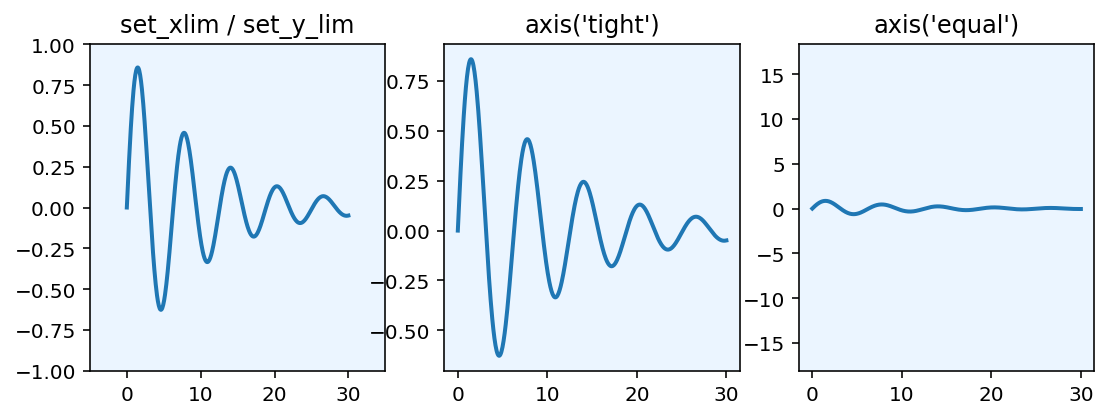

In [49]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

fig.savefig("ch4-axis-ranges.pdf")

### Ticks

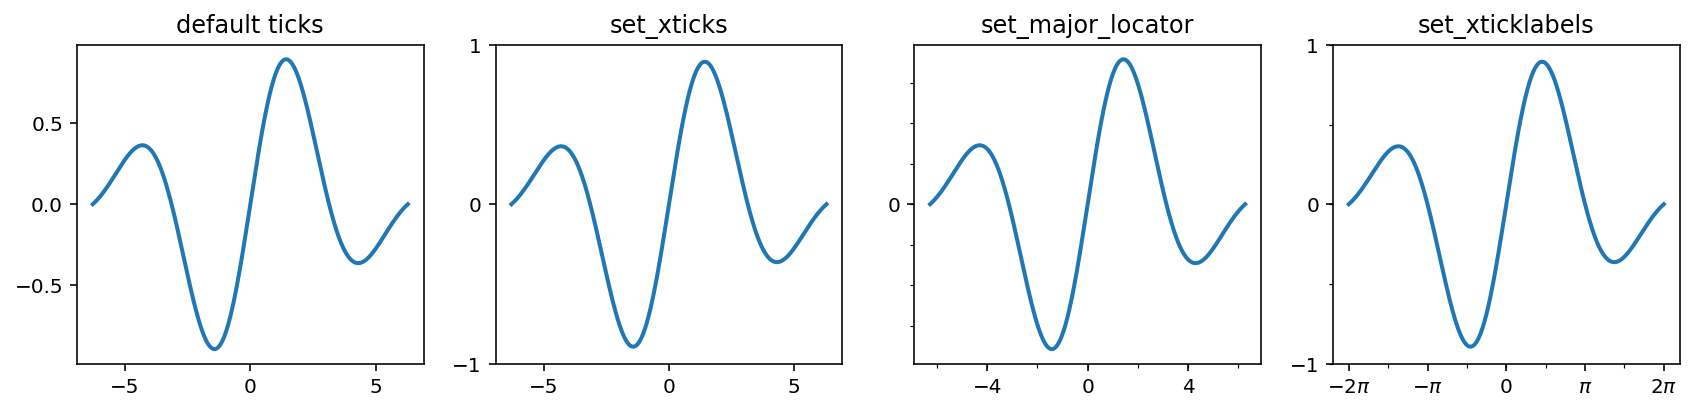

In [41]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])
axes[1].set_title("set_xticks")

axes[2].plot(x, y, lw=2)
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].set_title("set_major_locator")

axes[3].plot(x, y, lw=2)
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
axes[3].xaxis.set_minor_locator(mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2]))
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))
axes[3].set_title("set_xticklabels")

fig.tight_layout()
fig.savefig("ch4-axis-ticks.pdf")

#### Grid

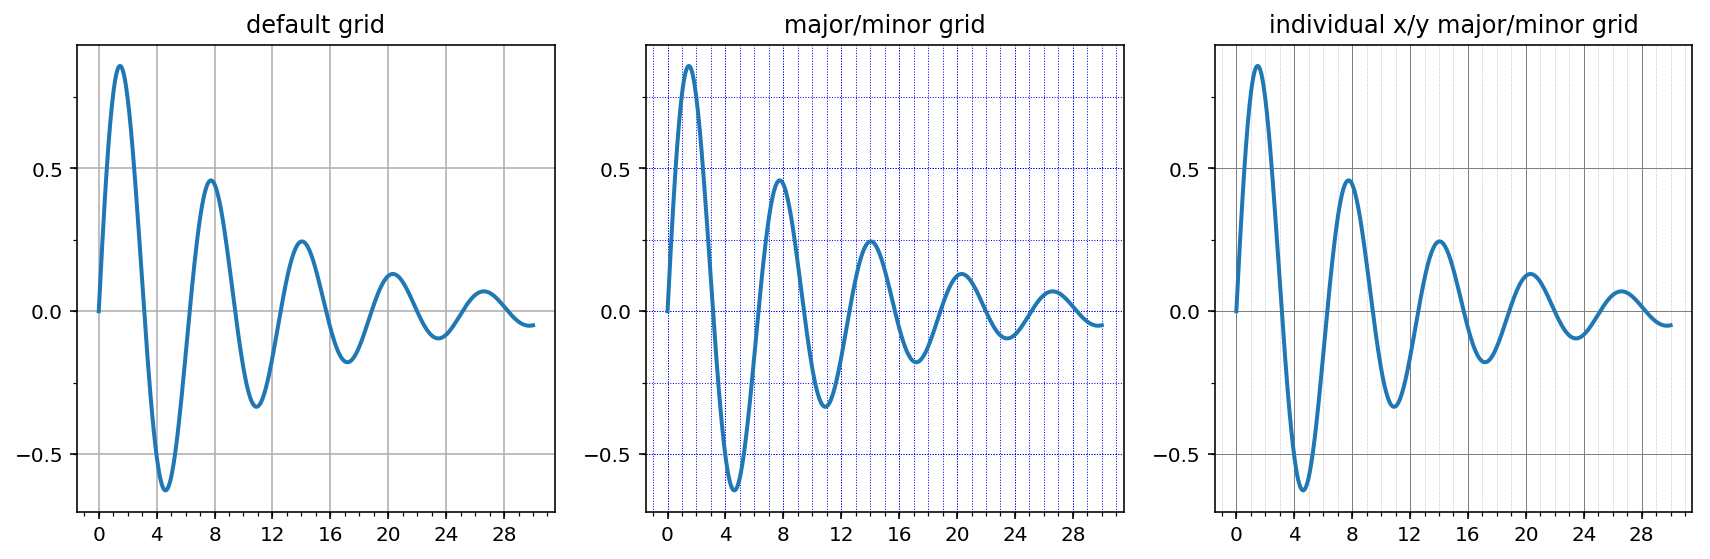

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

fig.tight_layout()
fig.savefig("ch4-axis-grid.pdf")

#### Ticker formatting

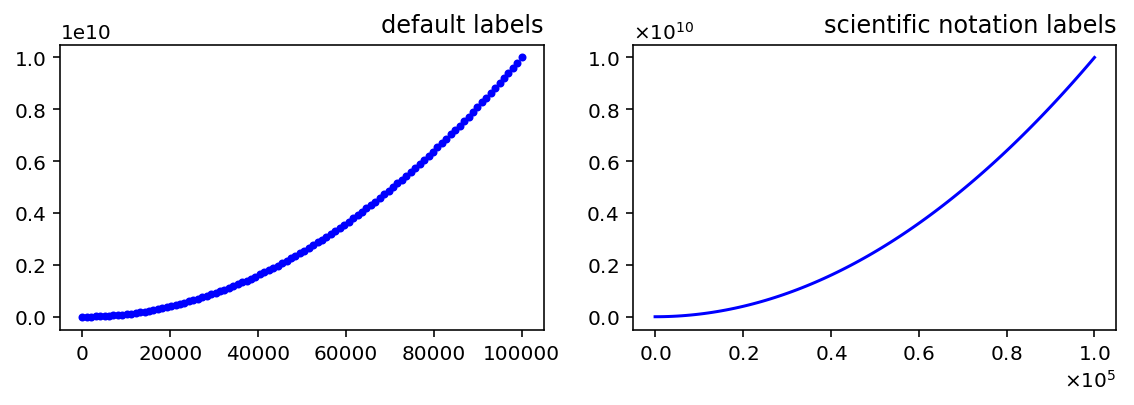

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)
y = x ** 2

axes[0].plot(x, y, 'b.')
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

fig.tight_layout()
fig.savefig("ch4-axis-scientific.pdf")

## Log plots

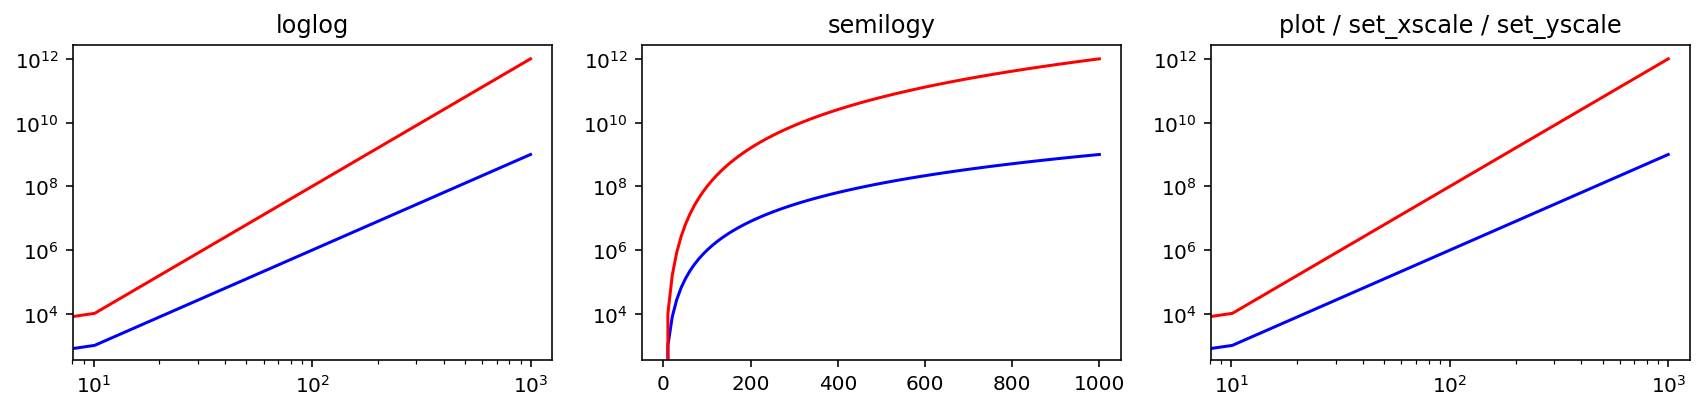

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

fig.tight_layout()
fig.savefig("ch4-axis-log-plots.pdf")

## Twin axes

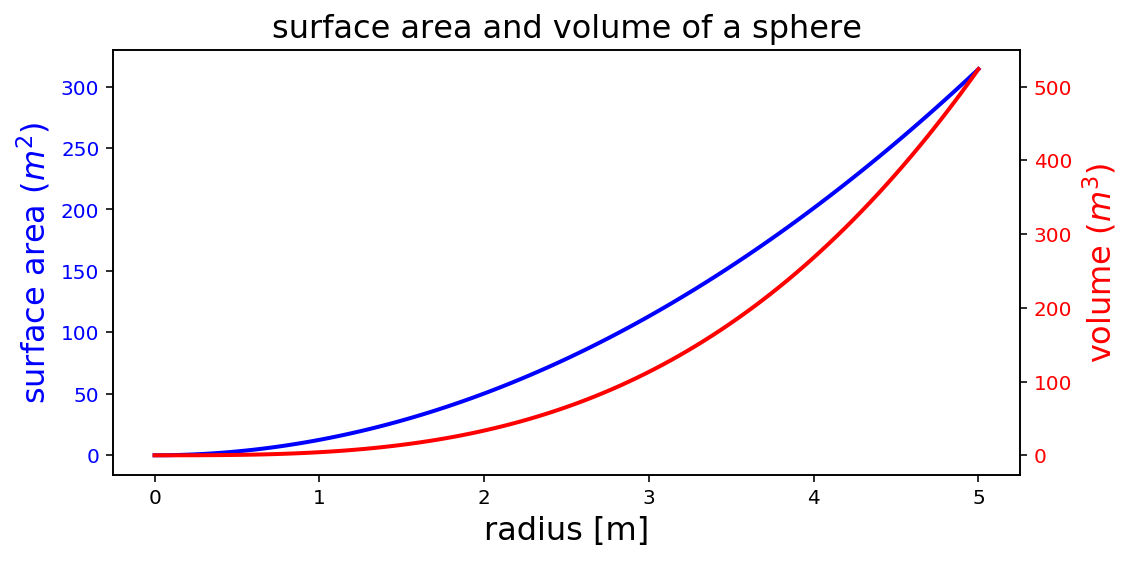

In [45]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2  # area
v = (4 * np.pi / 3) * r ** 3  # volume


ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
fig.tight_layout()
fig.savefig("ch4-axis-twin-ax.pdf")

## Spines

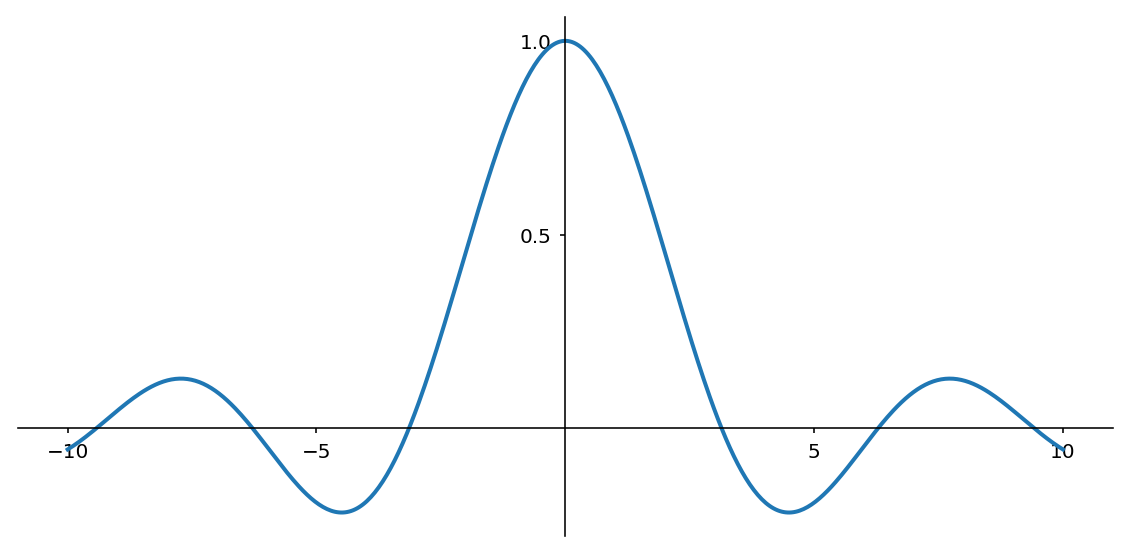

In [46]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2)

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
    
ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({'facecolor': 'white',
                    'edgecolor': 'white'})
    
fig.tight_layout()
fig.savefig("ch4-axis-spines.pdf")

## Advanced grid layout

### Inset

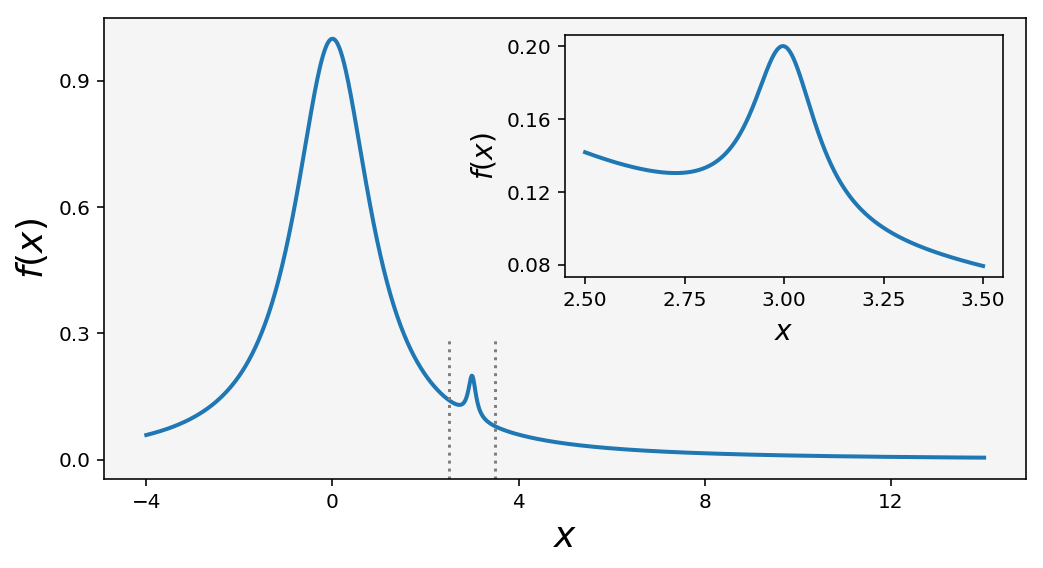

In [47]:
fig = plt.figure(figsize=(8, 4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

fig.savefig("ch4-advanced-axes-inset.pdf")

## Subplots

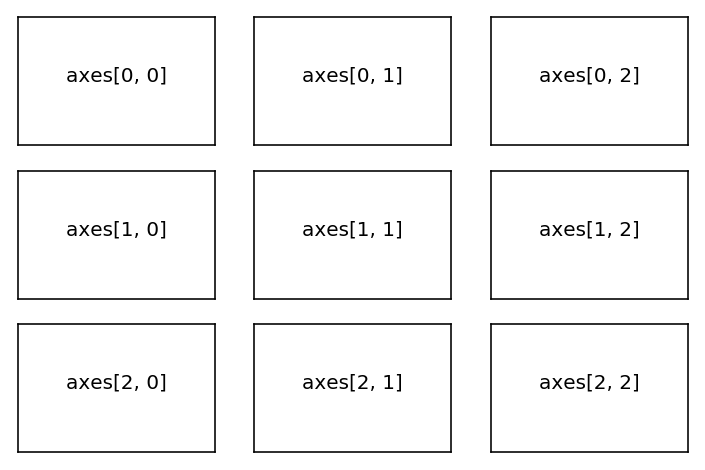

In [48]:
ncols, nrows = 3, 3

fig, axes = plt.subplots(nrows, ncols)

for m in range(nrows):
    for n in range(ncols):
        axes[m, n].set_xticks([])
        axes[m, n].set_yticks([])
        axes[m, n].text(0.5, 0.5, "axes[%d, %d]" % (m, n),
                        horizontalalignment='center')

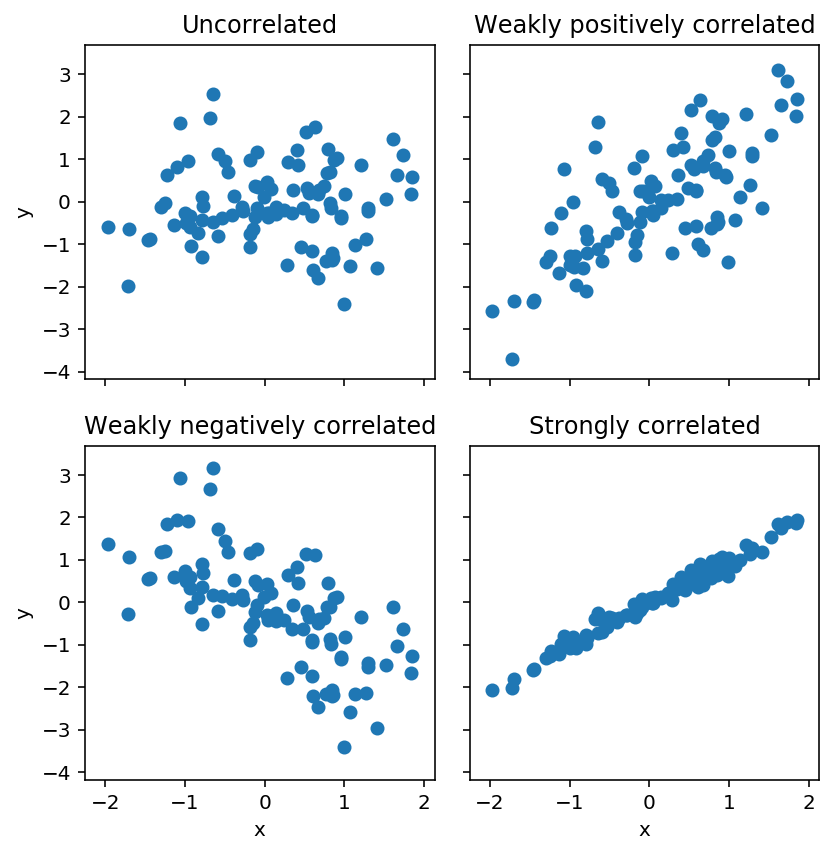

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)

fig.savefig("ch4-advanced-axes-subplots.pdf")

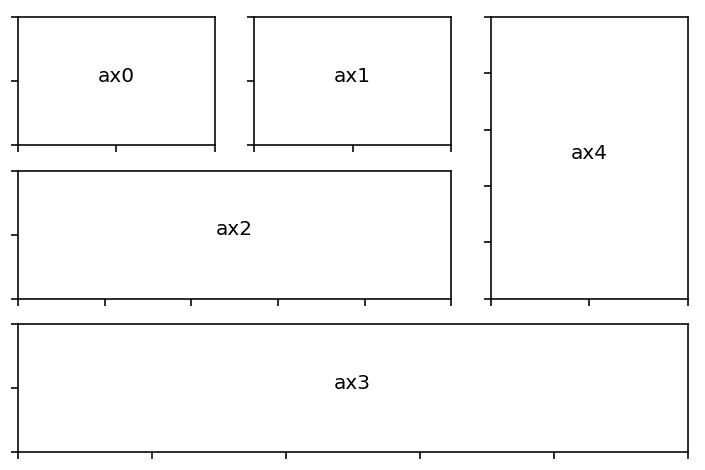

In [50]:
fig = plt.figure()

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

axes = [ax0, ax1, ax2, ax3, ax4]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

fig.savefig("ch4-advanced-axes-subplot2grid.pdf")

### gridspec

In [51]:
from matplotlib.gridspec import GridSpec

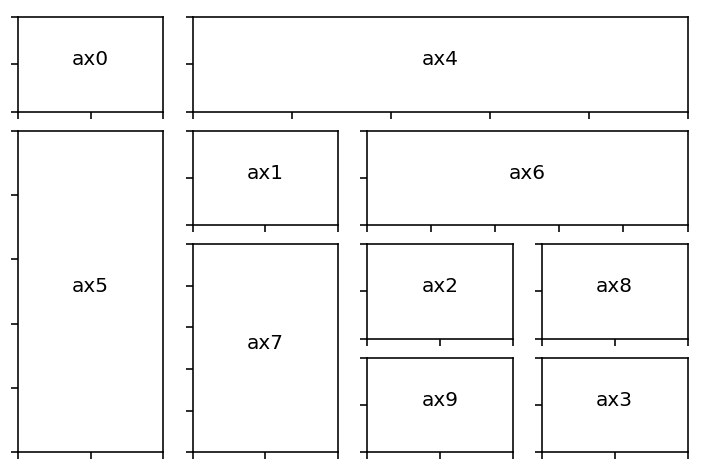

In [52]:
fig = plt.figure(figsize=(6, 4))

gs = mpl.gridspec.GridSpec(4, 4)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])

ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])

ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])

ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])


def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

fig.savefig("ch4-advanced-axes-gridspec-1.pdf")

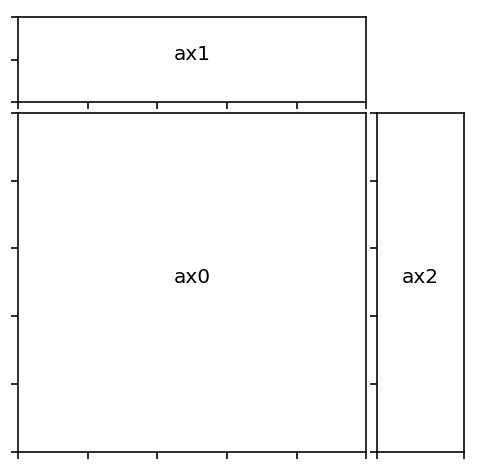

In [53]:
fig = plt.figure(figsize=(4, 4))

gs = mpl.gridspec.GridSpec(2, 2,
                           width_ratios=[4, 1],
                           height_ratios=[1, 4],
                           wspace=0.05, hspace=0.05
                           )

ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes = [ax0, ax1, ax2]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

fig.savefig("ch4-advanced-axes-gridspec-2.pdf")

## Colormap

In [54]:
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)

R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)


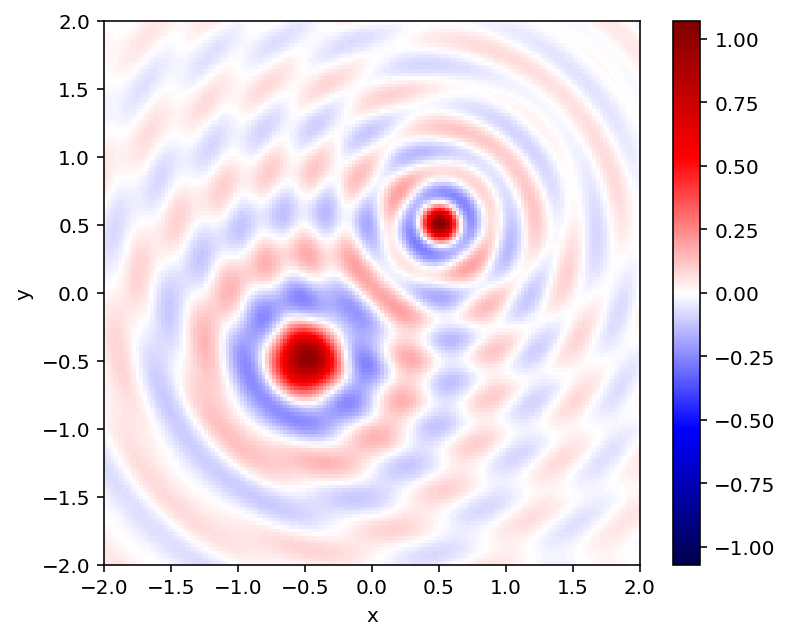

In [55]:
Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)

fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())
ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
cb = fig.colorbar(p, ax=ax)

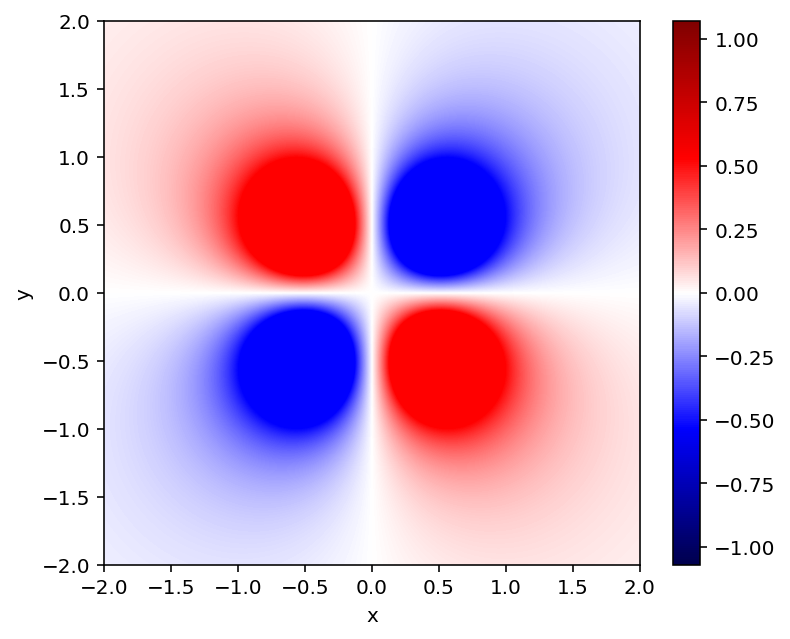

In [56]:
Z = 1/R1 - 1/R2 - 1/R3 + 1/R4

fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,
               extent=[x.min(), x.max(), y.min(), y.max()])
im.set_interpolation('bilinear')

ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
cb = fig.colorbar(p, ax=ax)

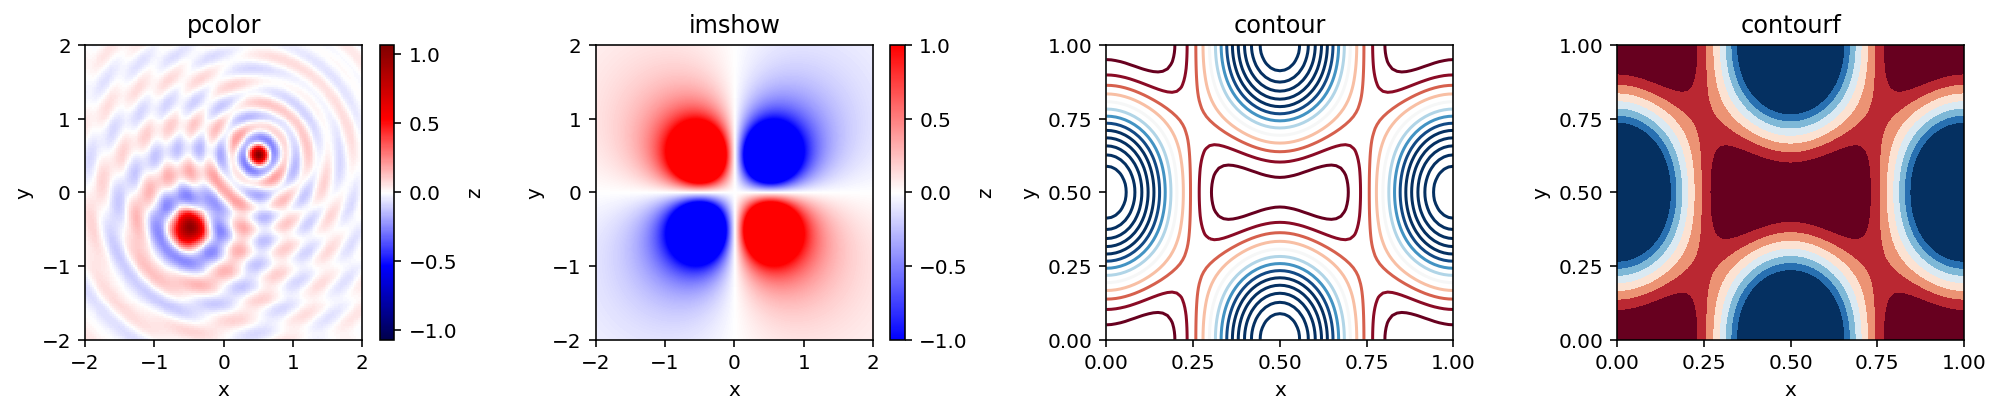

In [57]:
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)

R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)

fig, axes = plt.subplots(1, 4, figsize=(14, 3))

Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)


p = axes[0].pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())
axes[0].axis('tight')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title("pcolor")
axes[0].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[0].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))


cb = fig.colorbar(p, ax=axes[0])
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])


Z = 1/R1 - 1/R2 - 1/R3 + 1/R4

im = axes[1].imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,
               extent=[x.min(), x.max(), y.min(), y.max()])
im.set_interpolation('bilinear')

axes[1].axis('tight')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title("imshow")
cb = fig.colorbar(im, ax=axes[1])

axes[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
#cb.ax.set_axes_locator(mpl.ticker.MaxNLocator(4))
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])

x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)
Z = - 2 * np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y) - 0.7 * np.cos(np.pi - 4*np.pi*X)

c = axes[2].contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

axes[2].axis('tight')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title("contour")

axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))


c = axes[3].contourf(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

axes[3].axis('tight')
axes[3].set_xlabel('x')
axes[3].set_ylabel('y')
axes[3].set_title("contourf")

axes[3].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[3].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

fig.tight_layout()
fig.savefig('ch4-colormaps.pdf')


Text(0,0.5,'y')

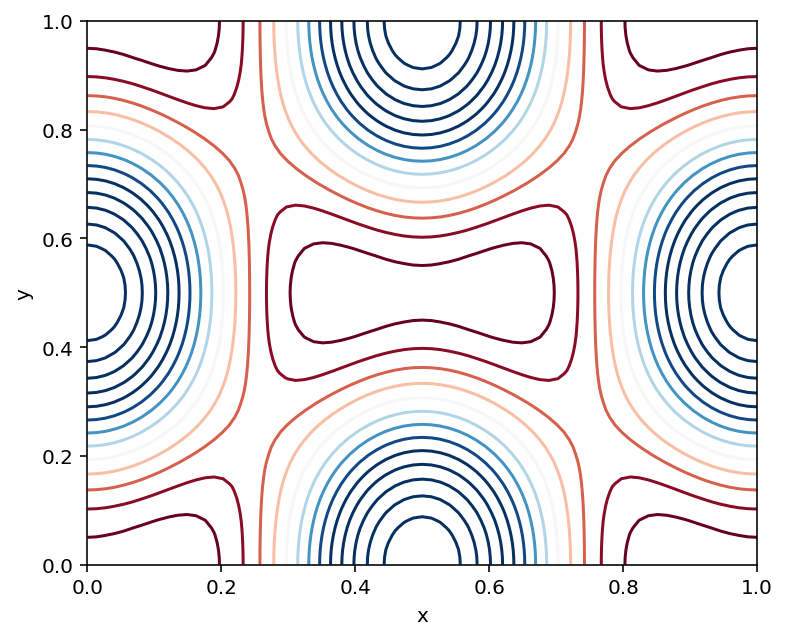

In [58]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)

Z = - 2 * np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y) - 0.7 * np.cos(np.pi - 4*np.pi*X)

c = ax.contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')

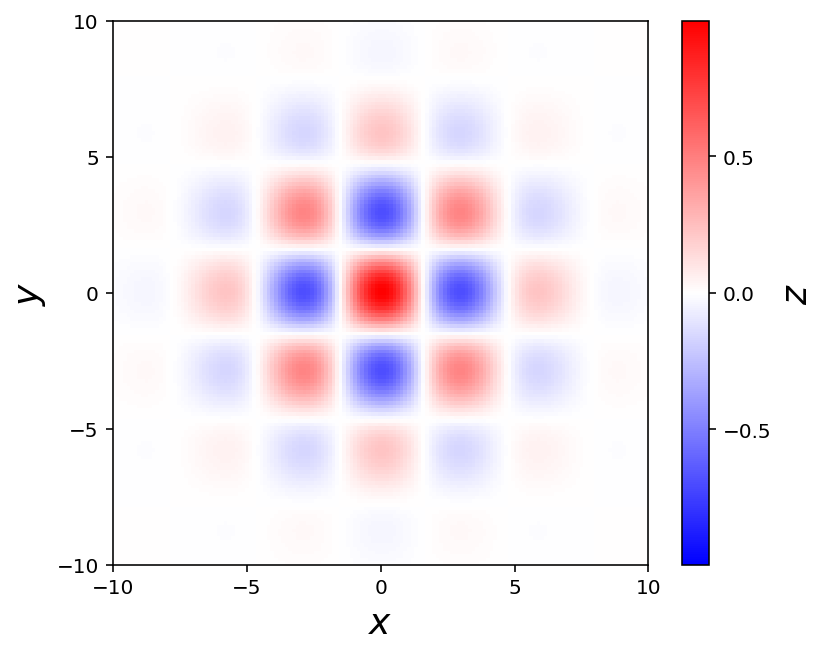

In [59]:
x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2-(Y/5)**2)

fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, vmin=-abs(Z).max(), vmax=abs(Z).max(), cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)
cb.set_label(r"$z$", fontsize=18)
cb.set_ticks([-1, -.5, 0, .5, 1])

fig.savefig("ch4-colormap-pcolor.pdf")

## 3D plots

In [60]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [61]:
x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

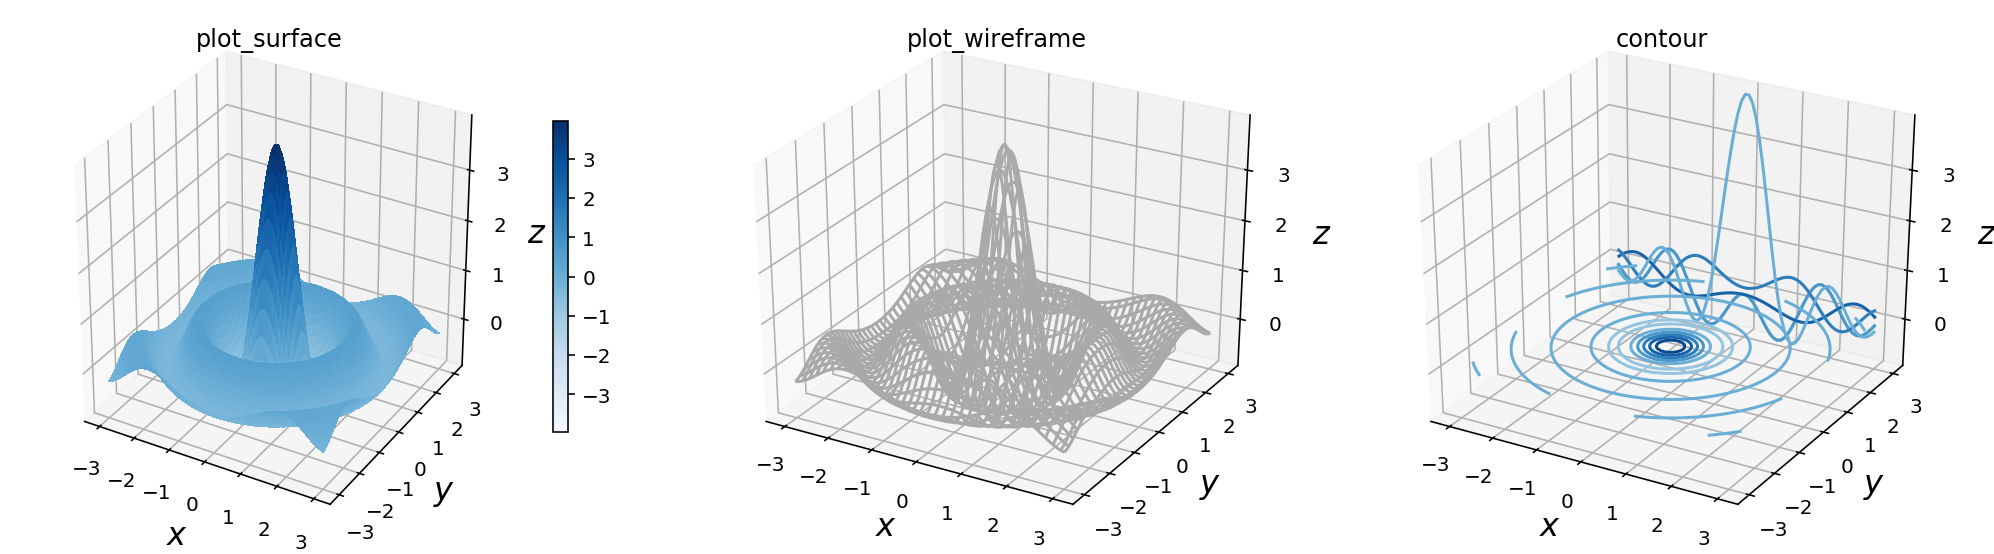

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues)
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour")

fig.tight_layout()
fig.savefig("ch4-3d-plots.png", dpi=200)

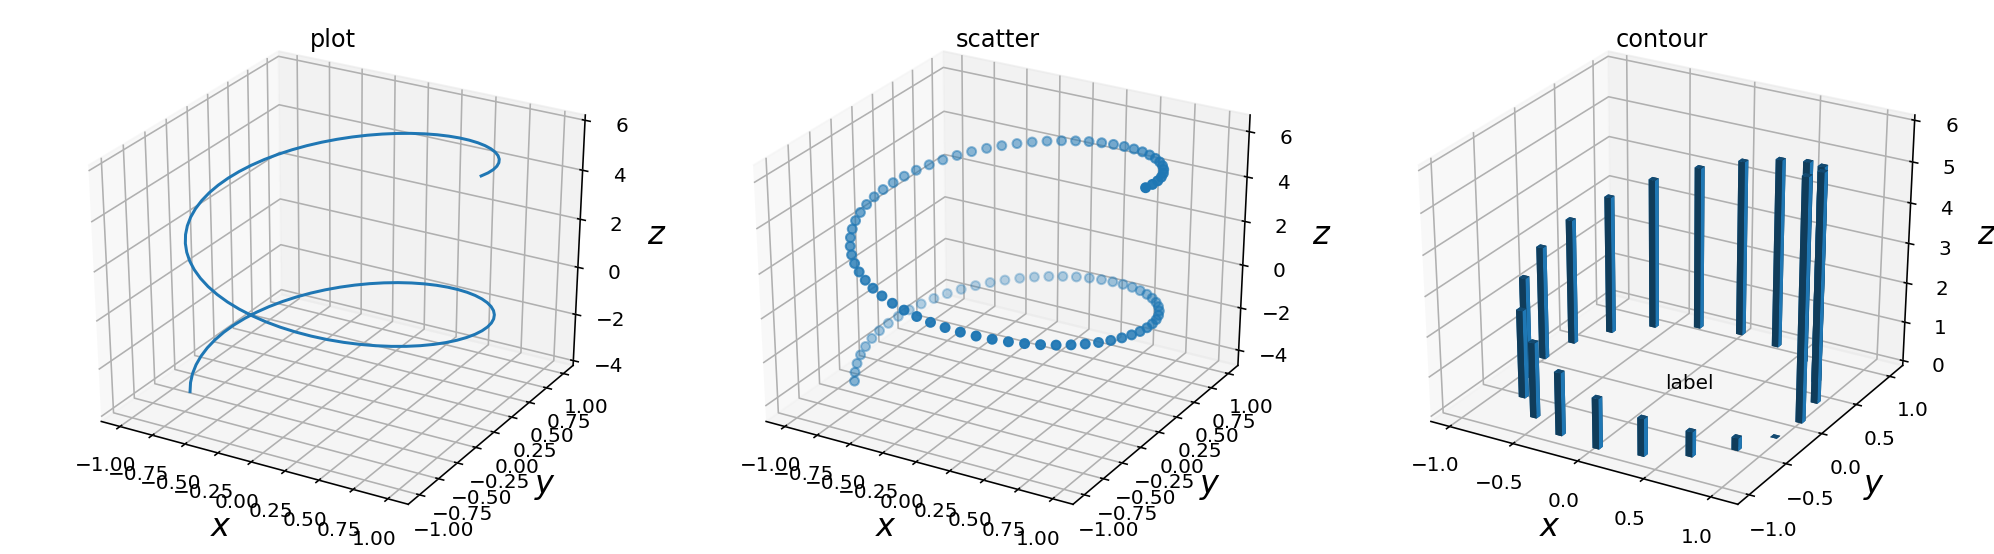

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

r = np.linspace(0, 10, 100)
p = axes[0].plot(np.cos(r), np.sin(r), 6 - r)
#cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot")

p = axes[1].scatter(np.cos(r), np.sin(r), 6 - r)
title_and_labels(axes[1], "scatter")

r = np.linspace(0, 6, 20)
p = axes[2].bar3d(np.cos(r), np.sin(r), 0* np.ones_like(r), 0.05* np.ones_like(r), 0.05 * np.ones_like(r), 6 - r)
title_and_labels(axes[2], "contour")
axes[2].text(0, 0, 0, "label")
fig.tight_layout()
#fig.savefig("ch4-3d-plots.png", dpi=200)

## Versions

In [ ]:
# %reload_ext version_information

In [ ]:
# %version_information numpy, matplotlib